---


# **Building kNN and Logistic Regression Classifiers**

---
**Dataset Path:** "Data/stroke.csv"
---

We will deal with the stroke dataset. The dataset contains demographic and health-related data to predict whether a patient is likely to have a stroke.

**Features:**


* id: Unique identifier (can be ignored for modeling).
* gender: Gender of the patient (categorical).
* age: Age of the patient (numerical).
* hypertension: Whether the patient has hypertension (0 = No, 1 = Yes).
* heart_disease: Whether the patient has heart disease (0 = No, 1 = Yes).
* ever_married: Marital status (categorical).
* work_type: Type of work (categorical).
* Residence_type: Rural or Urban (categorical).
* avg_glucose_level: Average glucose level (numerical).
* bmi: Body Mass Index (numerical).
* smoking_status: Smoking habits (categorical).
* stroke: Target variable (1 = Stroke, 0 = No Stroke).

# **Necessary Imports**

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import random

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve
from imblearn.over_sampling import SMOTE

# **PART- 1: Data Preprocessing and Visualization (35 Pts)**

---

## 1.1. Explaratory Data Analysis (20 Pts)

* Load the dataset
* Check and Handle Missing Values

  * Identify columns with missing values.
  * Replace missing values using suitable methods (mean or median imputation).

* Check and Handle Outliers

  * Detect outliers in numerical features
  * Handle outliers appropriately

* Convert categorical variables into numerical values.
* Perform data normalization



### Load the dataset

In [2]:
#initialize the data frame
df = pd.read_csv("Data/stroke.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


### Check and Handle Missing Value

In [3]:
#Check for missing values
print(df.isnull().sum().sum())

201


In [4]:
#Check for missing values for each column
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

There are 201 missing values in the **bmi** column.

In [5]:
# Calculate the median of bmi
median_bmi = df['bmi'].median()
median_bmi

np.float64(28.1)

In [6]:
# Replace missing bmi values using median
df["bmi"] = df["bmi"].fillna(median_bmi)

### Check and Handle Outliers

In [7]:
# Select the numeric variables
numeric_columns = df[['age', 'avg_glucose_level', 'bmi']]

# Calculate the 1st and 3rd quartiles to find the IQR
Q1 = numeric_columns.apply(lambda x: x.quantile(0.25))
Q3 = numeric_columns.apply(lambda x: x.quantile(0.75))
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR; # Lower bound: Values more than 1.5 IQR below Q1
upper_bound = Q3 + 1.5 * IQR; # Upper bound: Values more than 1.5 IQR above Q3

#Values that are more than 1.5 IQR below Q1 or more than 1.5 IQR above Q3 are considered outliers.
numeric_outliers = ((numeric_columns < lower_bound) | (numeric_columns > upper_bound))

print(numeric_outliers.sum()) 

age                    0
avg_glucose_level    627
bmi                  126
dtype: int64


IQR is more reliable in detecting outliers regardless of the data distribution, provides accurate analysis by filtering out extreme values, is easy to compute, and is also suitable for visualization using the boxplot method.

In [8]:
# The outliers in the age column were replaced with the median value.
median_age = df['age'].median()
df['age'] = df['age'].where(~numeric_outliers['age'], median_age)

# The outliers in the avg_glucose_level column were replaced with the median value.
median_avg_glucose_level = df['avg_glucose_level'].median()
df['avg_glucose_level'] = df['avg_glucose_level'].where(~numeric_outliers['avg_glucose_level'], median_avg_glucose_level)

# The outliers in the bmi column were replaced with the median value.
df['bmi'] = df['bmi'].where(~numeric_outliers['bmi'], median_bmi)

In [9]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,91.885,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,91.885,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.920,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,91.885,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,91.885,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.750,28.1,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.200,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.990,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.290,25.6,formerly smoked,0


### Convert categorical variables into numerical values.

In [10]:
# categorical variables: gender, ever_married, work_type, Residence_type, smoking_status
original_df = df.copy()
# Map the 'gender' column to numerical values: Male = 0, Female = 1
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1, 'Other':3})

# Map the 'ever_married' column to numerical values: No = 0, Yes = 1
df['ever_married'] = df['ever_married'].map({'No': 0, 'Yes': 1})

# Map the 'work_type' column to numerical values: Assign unique integers to each category
df['work_type'] = df['work_type'].map({'Private': 0, 'Self-employed': 1, 'Govt_job':2, 'children':3, 'Never_worked':4})

# Map the 'Residence_type' column to numerical values: Rural = 0, Urban = 1
df['Residence_type'] = df['Residence_type'].map({'Rural': 0, 'Urban': 1})

# Map the 'smoking_status' column to numerical values: Assign unique integers to each category
df['smoking_status'] = df['smoking_status'].map({'formerly smoked': 0, 'never smoked': 1, 'smokes':2, 'Unknown':3})
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67.0,0,1,1,0,1,91.885,36.6,0,1
1,51676,1,61.0,0,0,1,1,0,91.885,28.1,1,1
2,31112,0,80.0,0,1,1,0,0,105.920,32.5,1,1
3,60182,1,49.0,0,0,1,0,1,91.885,34.4,2,1
4,1665,1,79.0,1,0,1,1,0,91.885,24.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,1,80.0,1,0,1,0,1,83.750,28.1,1,0
5106,44873,1,81.0,0,0,1,1,1,125.200,40.0,1,0
5107,19723,1,35.0,0,0,1,1,0,82.990,30.6,1,0
5108,37544,0,51.0,0,0,1,0,0,166.290,25.6,0,0


### Perform data normalization

In [11]:
# Numerical variables to be normalized are: age, avg_glucose_level, and bmi.

numeric_columns = ['age', 'avg_glucose_level', 'bmi']
# Apply Min-Max normalization to scale the numerical columns to a range between 0 and 1
df[numeric_columns] = MinMaxScaler().fit_transform(df[numeric_columns])
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,0.816895,0,1,1,0,1,0.323750,0.724928,0,1
1,51676,1,0.743652,0,0,1,1,0,0.323750,0.481375,1,1
2,31112,0,0.975586,0,1,1,0,0,0.447341,0.607450,1,1
3,60182,1,0.597168,0,0,1,0,1,0.323750,0.661891,2,1
4,1665,1,0.963379,1,0,1,1,0,0.323750,0.363897,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,1,0.975586,1,0,1,0,1,0.252113,0.481375,1,0
5106,44873,1,0.987793,0,0,1,1,1,0.617119,0.822350,1,0
5107,19723,1,0.426270,0,0,1,1,0,0.245421,0.553009,1,0
5108,37544,0,0.621582,0,0,1,0,0,0.978954,0.409742,0,0


## 1.2. Data Visualization (10 Pts)

* Visualize the distribution of numerical features
* Analyze the relationship between categorical features (e.g., gender, work_type) and the target variable (stroke).
* Plot a correlation heatmap to analyze their relationships.
* Comment on any findings

### Visualize the distribution of numerical features

#### Visualize the distribution of **age**

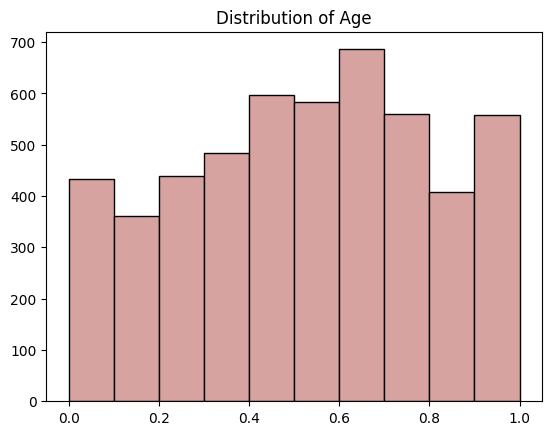

In [12]:
# Since age is a numerical variable, it was visualized using a histogram.
plt.hist(df['age'],  color='#D7A3A1', edgecolor='black') 

plt.title('Distribution of Age')
plt.show()

Looking at the histogram, we can say that the age data is somewhat concentrated in the 0.4-0.6 range and has lower frequencies at the extremes. However, it exhibits an overall balanced distribution. In other words, middle-aged individuals are slightly more represented in the dataset compared to younger and older individuals.

#### Visualize the distribution of **avg_glucose_level**

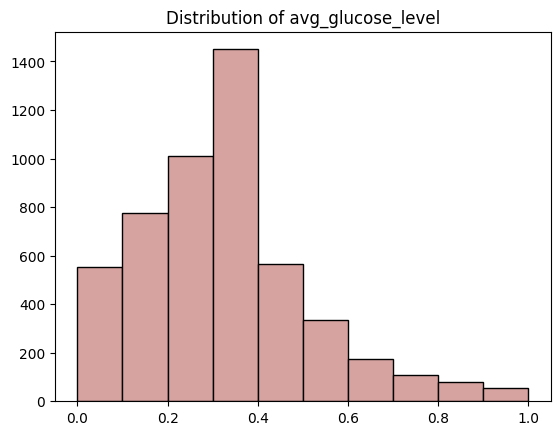

In [13]:
# Since avg_glucose_level is a numerical variable, it was visualized using a histogram.
plt.hist(df['avg_glucose_level'], color='#D7A3A1', edgecolor='black') 
plt.title('Distribution of avg_glucose_level')
plt.show()

The average glucose level increases up to the 0.4 mark, peaks in the 0.3-0.4 range, and then sharply declines, gradually decreasing afterward. It can be said to have a left-skewed structure.

#### Visualize the distribution of **bmi**

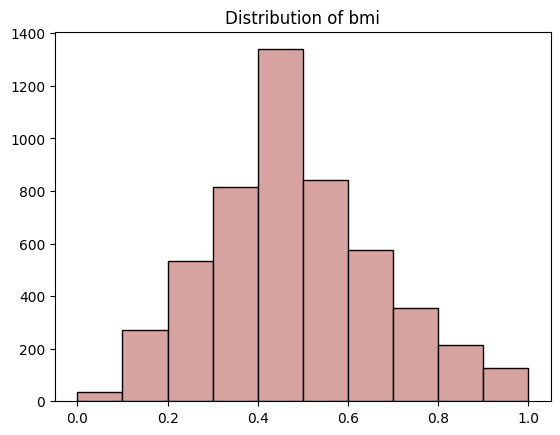

In [14]:
plt.hist(df['bmi'], color='#D7A3A1', edgecolor='black') 
plt.title('Distribution of bmi')
plt.show()

The BMI distribution follows a normal distribution. It gradually increases from 0.0 to 0.4, peaks between 0.4-0.5, and then decreases again.

### Analyze the relationship between categorical features (e.g., gender, work_type) and the target variable (stroke).

##### Analyze the relationship between **gender** and stroke

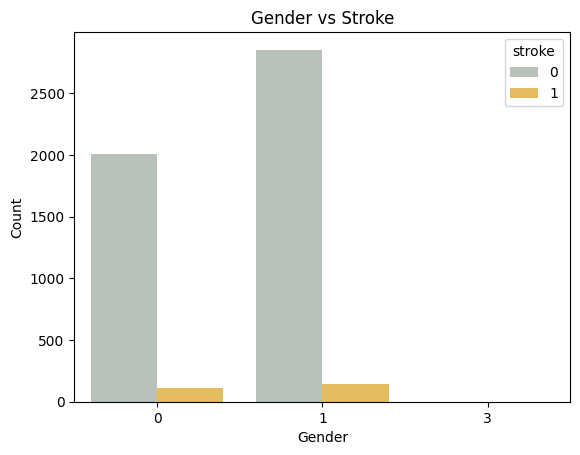

In [15]:
#target variable is 'stroke'

# Create a count plot to visualize the relationship between 'gender' and 'stroke'
# 'x' represents the gender, 'hue' represents the 'stroke' to distinguish between the two classes.
sns.countplot(data=df, x='gender', hue='stroke', palette=['#B7C3B9', '#FAC546'])
plt.title('Gender vs Stroke')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

When the plot is examined, the stroke 1 ratio is much lower than the stroke 0 ratio for both male and female.

##### Analyze the relationship between **ever_married** and stroke

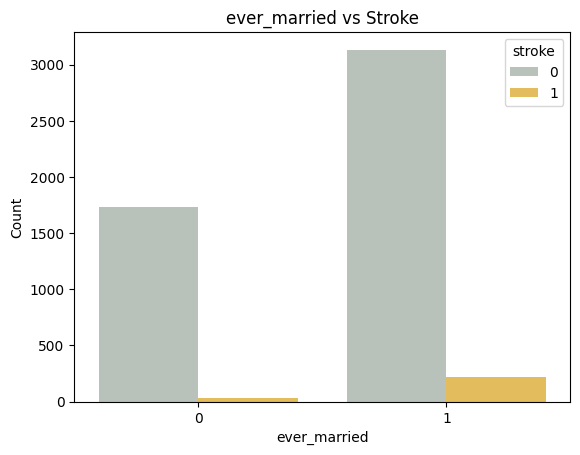

In [16]:
#target variable is 'stroke'

# Create a count plot to visualize the relationship between 'ever_married' and 'stroke'
# 'x' represents the ever_married , 'hue' represents the 'stroke' to distinguish between the two classes.
sns.countplot(data=df, x='ever_married', hue='stroke', palette=['#B7C3B9', '#FAC546'])
plt.title('ever_married vs Stroke')
plt.xlabel('ever_married')
plt.ylabel('Count')
plt.show()

When the plot is examined, it is observed that the count of "ever_married = yes" values is higher than "ever_married = no" values, and for both "yes" and "no," the number of stroke 0 values is significantly higher than stroke 1 values.

##### Analyze the relationship between **work_type** and stroke

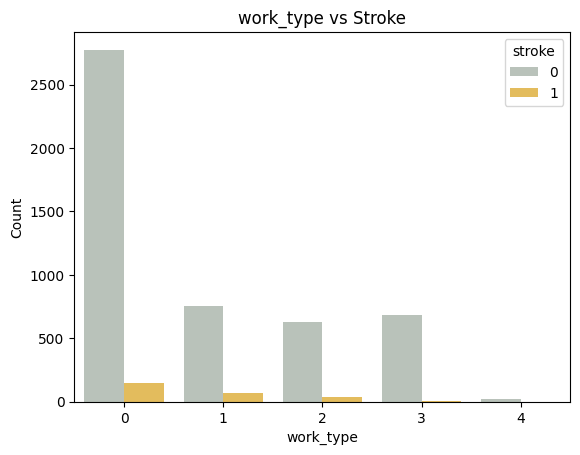

In [17]:
#target variable is 'stroke'

# Create a count plot to visualize the relationship between 'work_type' and 'stroke'
# 'x' represents the work_type , 'hue' represents the 'stroke' to distinguish between the two classes.
sns.countplot(data=df, x='work_type', hue='stroke', palette=['#B7C3B9', '#FAC546'])
plt.title('work_type vs Stroke')
plt.xlabel('work_type')
plt.ylabel('Count')
plt.show()

When the plot is examined, it is observed that "work_type = private" has the highest count compared to other categories, and for all work types, the number of stroke 0 values is significantly higher than stroke 1 values. Additionally, almost all "children" values are stroke 0, and "never_worked" values are very few in number.

##### Analyze the relationship between **Residence_type** and stroke

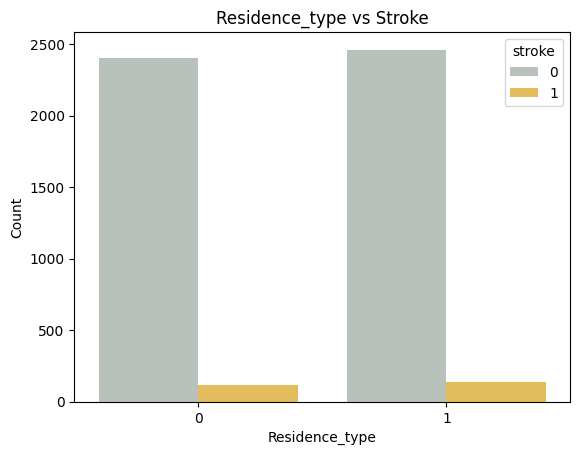

In [18]:
#target variable is 'stroke'

# Create a count plot to visualize the relationship between 'Residence_type' and 'stroke'
# 'x' represents the Residence_type , 'hue' represents the 'stroke' to distinguish between the two classes.
sns.countplot(data=df, x='Residence_type', hue='stroke', palette=['#B7C3B9', '#FAC546'])
plt.title('Residence_type vs Stroke')
plt.xlabel('Residence_type')
plt.ylabel('Count')
plt.show()

When the plot is examined, it is observed that the "urban" and "rural" values are almost equal, and for both, the number of stroke 0 values is significantly higher than stroke 1 values.

##### Analyze the relationship between **smoking_status** and stroke

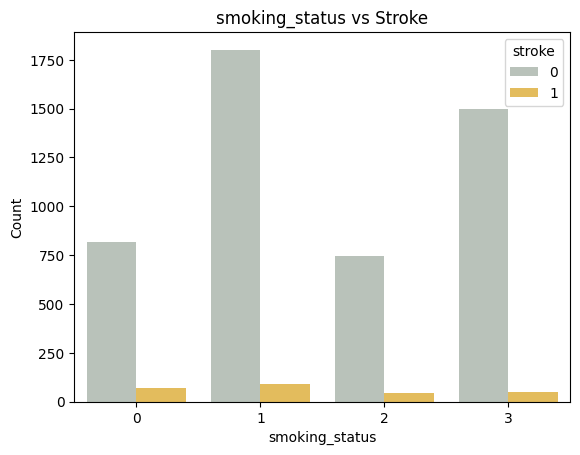

In [19]:
#target variable is 'stroke'

# Create a count plot to visualize the relationship between 'smoking_status' and 'stroke'
# 'x' represents the smoking_status , 'hue' represents the 'stroke' to distinguish between the two classes.
sns.countplot(data=df, x='smoking_status', hue='stroke', palette=['#B7C3B9', '#FAC546'])
plt.title('smoking_status vs Stroke')
plt.xlabel('smoking_status')
plt.ylabel('Count')
plt.show()

When the plot is examined, it is observed that the number of "never_smoked" values is higher than the others, and for all smoking_status values, the count of stroke 0 is significantly greater than stroke 1.

### Plot a correlation heatmap to analyze their relationships.

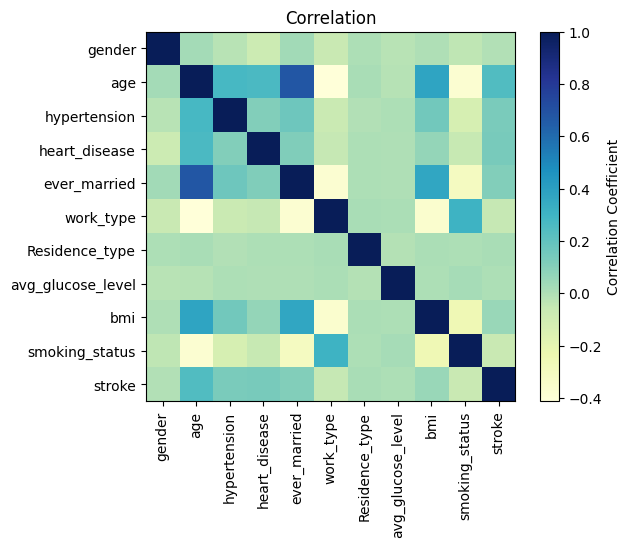

In [20]:
# select numerical variables except id 
numeric_df = df.select_dtypes(include=['float64', 'int64']).drop(columns=['id'])
correlation_matrix = numeric_df.corr()

# create heatmap
plt.imshow(correlation_matrix, cmap='YlGnBu')
plt.colorbar(label="Correlation Coefficient")

plt.xticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns)

plt.title('Correlation')
plt.show()

The correlation matrix shows that age, hypertension, heart disease, and glucose levels are positively correlated with stroke. Variables such as gender and residence type do not show a significant relationship with stroke. Overall, it can be said that medical factors have a greater impact on stroke risk.

## 1.3. Data Splitting (5 Pts)

* Manually split the dataset into training (70%) and testing (30%) sets
* Shuffle and split the data
* Avoid using predefined functions like train_test_split for this task


In [21]:
# Keep all possible indices in a list.
indices = list(range(len(df)))

# Create an empty dataframe to create the shuffled df.
shuffled_df = pd.DataFrame(columns=df.columns)

#Select a random index from the indices list and assign it to the shuffled_df sequentially.
#Then, remove that index from the indices list so it is no longer available.
for i in range(len(df)):
    rand_index = random.randint(0, len(indices) - 1)
    shuffled_df.loc[len(shuffled_df)] = df.iloc[indices[rand_index]].values

    indices.pop(rand_index)

shuffled_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,37634.0,0.0,0.060059,0.0,0.0,0.0,3.0,1.0,0.043765,0.237822,3.0,0.0
1,42284.0,0.0,0.865723,1.0,0.0,1.0,1.0,0.0,0.373811,0.446991,3.0,0.0
2,27693.0,1.0,0.182129,0.0,0.0,0.0,3.0,1.0,0.583568,0.449857,3.0,0.0
3,50463.0,1.0,0.499512,0.0,0.0,1.0,0.0,1.0,0.207996,0.888252,2.0,0.0
4,43054.0,1.0,0.609375,0.0,0.0,1.0,0.0,0.0,0.414230,0.575931,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,39322.0,0.0,0.218750,0.0,0.0,0.0,0.0,1.0,0.224287,0.335244,3.0,0.0
5106,16953.0,1.0,0.731445,0.0,0.0,1.0,2.0,0.0,0.060056,0.475645,0.0,0.0
5107,39017.0,1.0,0.877930,0.0,0.0,1.0,2.0,0.0,0.555653,0.303725,0.0,0.0
5108,32094.0,0.0,0.645996,1.0,0.0,1.0,1.0,1.0,0.207467,0.521490,1.0,0.0


In [22]:
#Take the first %70 of the shuffled DataFrame to create train_df and the remaining %30 to create test_df.
indices = list(shuffled_df.index)

train_size = int(0.7 * len(shuffled_df))

train_df = shuffled_df.iloc[indices[:train_size]]
test_df = shuffled_df.iloc[indices[train_size:]]

In [23]:
train_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,37634.0,0.0,0.060059,0.0,0.0,0.0,3.0,1.0,0.043765,0.237822,3.0,0.0
1,42284.0,0.0,0.865723,1.0,0.0,1.0,1.0,0.0,0.373811,0.446991,3.0,0.0
2,27693.0,1.0,0.182129,0.0,0.0,0.0,3.0,1.0,0.583568,0.449857,3.0,0.0
3,50463.0,1.0,0.499512,0.0,0.0,1.0,0.0,1.0,0.207996,0.888252,2.0,0.0
4,43054.0,1.0,0.609375,0.0,0.0,1.0,0.0,0.0,0.414230,0.575931,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3572,17006.0,0.0,0.230957,0.0,0.0,0.0,0.0,0.0,0.562874,0.704871,3.0,0.0
3573,29380.0,1.0,0.511719,1.0,0.0,1.0,0.0,0.0,0.306798,0.696275,1.0,0.0
3574,41730.0,1.0,0.560547,0.0,0.0,0.0,2.0,0.0,0.503434,0.349570,3.0,0.0
3575,32437.0,1.0,0.658203,0.0,0.0,1.0,1.0,1.0,0.460990,0.515759,0.0,0.0


In [24]:
test_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3577,35123.0,1.0,0.014160,0.0,0.0,0.0,3.0,1.0,0.256076,0.226361,3.0,0.0
3578,40124.0,0.0,0.877930,0.0,0.0,1.0,1.0,0.0,0.149436,0.481375,2.0,0.0
3579,16355.0,0.0,0.243164,0.0,0.0,0.0,0.0,1.0,0.365093,0.916905,1.0,0.0
3580,56410.0,0.0,0.021973,0.0,0.0,0.0,3.0,1.0,0.231596,0.063037,3.0,0.0
3581,23890.0,1.0,0.536133,1.0,0.0,1.0,2.0,0.0,0.446020,0.730659,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,39322.0,0.0,0.218750,0.0,0.0,0.0,0.0,1.0,0.224287,0.335244,3.0,0.0
5106,16953.0,1.0,0.731445,0.0,0.0,1.0,2.0,0.0,0.060056,0.475645,0.0,0.0
5107,39017.0,1.0,0.877930,0.0,0.0,1.0,2.0,0.0,0.555653,0.303725,0.0,0.0
5108,32094.0,0.0,0.645996,1.0,0.0,1.0,1.0,1.0,0.207467,0.521490,1.0,0.0


# **PART- 2: Model Building (30 points)**

Implement two classification models:

* k-Nearest Neighbors (kNN)
* Logistic Regression


***You can use scikit-learn***




## 2.1. kNN Classifier (15 Pts)
* Build and train the kNN model
* Choose the optimal k value using Minkowski distance with at least two different values for p


In [25]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Separate the features (X) by dropping the 'stroke' column from the dataframe
X = df.drop(['stroke', 'id', 'work_type', 'smoking_status'], axis=1)

# Set the target variable (y) to the 'stroke' column
y = df['stroke']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# Apply SMOTE to handle data imbalance
smote = SMOTE(random_state=10, k_neighbors=3, sampling_strategy=0.7)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [26]:
# for p=1 Manhattan 

#Train a model for all values from 1 to 30 by selecting a k value,
#calculate the accuracies for each, and append it to the accuracies list.
accuracies = []

for k in range(1, 31):
    knn_model = KNeighborsClassifier(n_neighbors=k,  metric='minkowski', p=1)
    knn_model.fit(X_train_smote, y_train_smote)
    y_pred_knn = knn_model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred_knn))

# print accuracies for each k values
accuracies

[0.8695368558382257,
 0.883235485975212,
 0.8336594911937377,
 0.8493150684931506,
 0.8160469667318982,
 0.8336594911937377,
 0.8043052837573386,
 0.8199608610567515,
 0.7873450750163079,
 0.8023483365949119,
 0.7821265492498369,
 0.79191128506197,
 0.7795172863666014,
 0.786692759295499,
 0.7710371819960861,
 0.7775603392041748,
 0.7684279191128506,
 0.7729941291585127,
 0.7632093933463796,
 0.7723418134377038,
 0.7645140247879973,
 0.7690802348336595,
 0.761252446183953,
 0.7690802348336595,
 0.7625570776255708,
 0.7651663405088063,
 0.7547292889758643,
 0.7638617090671885,
 0.7553816046966731,
 0.7645140247879973]

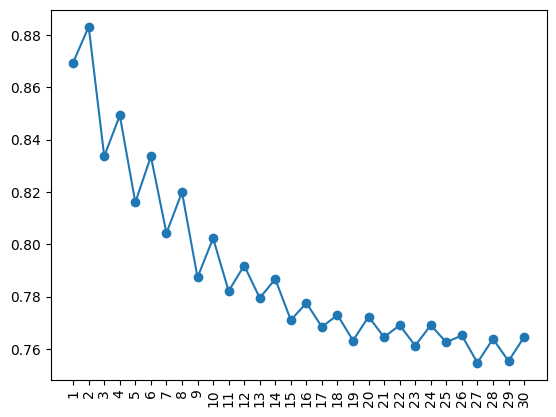

In [27]:
# visualize the accuracy values for each k 
plt.plot(range(1, 31), accuracies, marker='o')
plt.xticks(range(1, 31), rotation = 90)
plt.show()

When examining the plot, it can be seen that the accuracy is the highest when k = 2.

In [28]:
# for p=2 Euclidean

#Train a model for all values from 1 to 30 by selecting a k value,
#calculate the accuracies for each, and append it to the accuracies list.
accuracies = []

for k in range(1, 31):
    knn_model = KNeighborsClassifier(n_neighbors=k,  metric='minkowski', p=2)
    knn_model.fit(X_train_smote, y_train_smote)
    y_pred = knn_model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# print accuracies for each k values
accuracies

[0.8708414872798435,
 0.8871493803000652,
 0.8310502283105022,
 0.8467058056099152,
 0.817351598173516,
 0.8343118069145466,
 0.8101761252446184,
 0.8238747553816047,
 0.8010437051532941,
 0.8075668623613829,
 0.79191128506197,
 0.8062622309197651,
 0.7840834964122635,
 0.7912589693411611,
 0.7684279191128506,
 0.7782126549249837,
 0.766470971950424,
 0.771689497716895,
 0.761252446183953,
 0.7671232876712328,
 0.7566862361382909,
 0.7632093933463796,
 0.7540769732550554,
 0.7579908675799086,
 0.7560339204174821,
 0.7632093933463796,
 0.7579908675799086,
 0.7645140247879973,
 0.7579908675799086,
 0.7592954990215264]

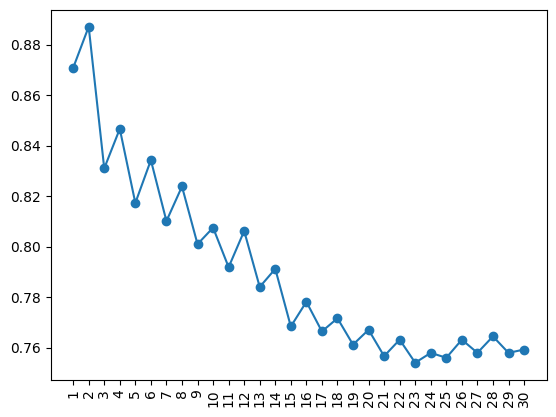

In [29]:
# visualize the accuracy values for each k 
plt.plot(range(1, 31), accuracies, marker='o')
plt.xticks(range(1, 31), rotation = 90)
plt.show()

When examining the plot, it can be seen that the accuracy is the highest when k = 2.

In [30]:
# train for k=2
knn_model = KNeighborsClassifier(n_neighbors=2)
knn_model.fit(X_train_smote, y_train_smote)
y_pred = knn_model.predict(X_test)

## 2.2. Logistic Regression (15 Pts)
* Build and train the Logistic Regression model

In [31]:
# Create logistic regression model 
log_reg_model = LogisticRegression(max_iter=5000)
# Train the model
log_reg_model.fit(X_train_smote, y_train_smote)
# predict the test data
y_pred_lr = log_reg_model.predict(X_test)

In [32]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8871493803000652


# **PART- 3: Model Evaluation (35 points)**



## 3.1 Confusion Matrix (15)

Analysis of the confusion matrices for both models:

* Plot and interpret the confusion matrices
* Display accuracy, precision, recall, and F1-score for both models



#### Confusion matrix for kNN Classifier

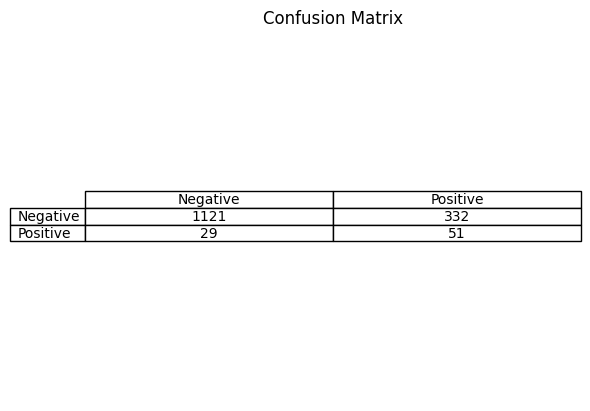

In [33]:
# Calculate the confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Plot the confusion matrix
# Create a df from the cm
cm_df = pd.DataFrame(cm_knn, index=['Negative', 'Positive'], columns=['Negative', 'Positive'])

plt.table(cellText=cm_df.values, colLabels=cm_df.columns, rowLabels=cm_df.index, loc='center', cellLoc='center')
plt.axis('off')
plt.title('Confusion Matrix')
plt.show()

According to the given confusion matrix, the model correctly classified 1121 negative class examples and 51 positive class examples. However, it misclassified 332 negative examples as positive and 29 positive examples as negative.

In [34]:
# calculate the accuracy
accuracy = accuracy_score(y_test, y_pred_knn)
accuracy

0.7645140247879973

accuracy = (TP + TN) / (TP+TN+FP+FN)

The accuracy score shows that the KNN model correctly classifies 76.4% of the examples in the test set.Although techniques like SMOTE for handling class imbalance have been used, the model can still be improved. The accuracy score is not good enough.

In [35]:
# calculate the precision
precision = precision_score(y_test, y_pred_knn)
precision

0.13315926892950392

precision = TP / (TP + FP)

Precision indicates the ratio of the model's true positive predictions to the total positive predictions. In other words, only 13.3% of the predictions made by the model for the positive class were correct. This is a low precision value, which means the model is mostly making false positive predictions.

In [36]:
# calculate the recall
recall = recall_score(y_test, y_pred_knn)
recall

0.6375

recall = TP / (TP + FN)

Recall indicates the ratio of the model's true positive predictions to the total actual positive examples. In other words, the model correctly identified 63.75% of the actual positive classes. We can say that the model's performance in this regard is low.

In [37]:
f1 = f1_score(y_test, y_pred_knn)
f1

0.2203023758099352

The F1 score is quite low. This indicates that the model shows weak performance in both precision and recall. This score indicates that the model's ability to correctly predict the positive class is weak, and issues such as class imbalance may be affecting its performance.

#### Confusion matrix for Logistic Regression

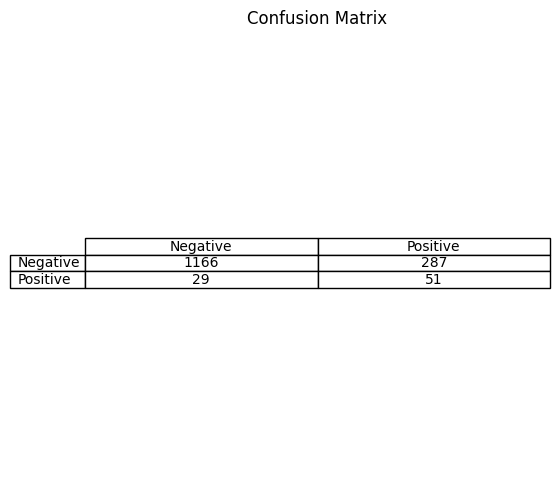

In [38]:
# Calculate the confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Plot the confusion matrix
# Create a df from the cm
cm_df = pd.DataFrame(cm_lr, index=['Negative', 'Positive'], columns=['Negative', 'Positive'])

plt.figure(figsize=(6, 6))
plt.table(cellText=cm_df.values, colLabels=cm_df.columns, rowLabels=cm_df.index, loc='center', cellLoc='center')
plt.axis('off')
plt.title('Confusion Matrix')
plt.show()

According to the given confusion matrix, the model correctly classified 1166 negative class examples and 51 positive class examples. However, it misclassified 287 negative examples as positive and 29 positive examples as negative.

In [39]:
# calculate the accuracy
accuracy = accuracy_score(y_test, y_pred_lr)
accuracy

0.7938682322243966

accuracy = (TP + TN) / (TP+TN+FP+FN)

The accuracy score shows that the KNN model correctly classifies 79.3% of the examples in the test set. This indicates that the model is performing well overall, but it is important to evaluate other metrics such as precision, recall, and F1 score.

In [40]:
# calculate the precision
precision = precision_score(y_test, y_pred_lr, zero_division = 0)
precision

0.15088757396449703

precision = TP / (TP + FP)

Precision indicates the ratio of the model's true positive predictions to the total positive predictions. In other words, only 15% of the predictions made by the model for the positive class were correct. This is a low precision value, which means the model is mostly making false positive predictions.

In [41]:
# calculate the recall
recall = recall_score(y_test, y_pred_lr)
recall

0.6375

recall = TP / (TP + FN)

Recall indicates the ratio of the model's true positive predictions to the total actual positive examples. In other words, the model correctly identified 63.75% of the actual positive classes. We can say that the model's performance in this regard is low.

In [42]:
f1 = f1_score(y_test, y_pred_lr)
f1

0.24401913875598086

Because of recall and precision scores are low, f1 score is also low.

## 3.2 Precision-Recall Curves (5)

Evaluate the Precision-Recall curves for both models:

* Plot and analyze the curves

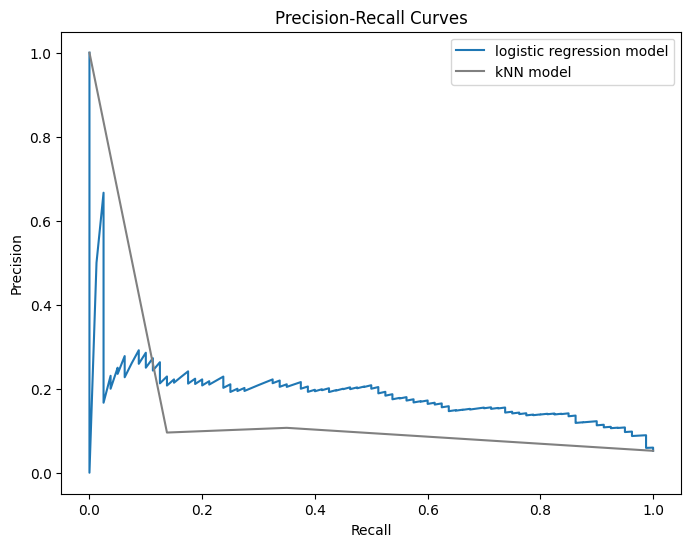

In [43]:
# Get predicted probabilities for logistic regression model
y_pred_prob_lr = log_reg_model.predict_proba(X_test)[:, 1]

# Get predicted probabilities for knn model
y_pred_prob_knn = knn_model.predict_proba(X_test)[:, 1]

#calculate Precision ve Recall for both
precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_pred_prob_lr)
precision_knn, recall_knn, _ = precision_recall_curve(y_test, y_pred_prob_knn)

# plot 
plt.figure(figsize=(8, 6))

# for logistic regression model
plt.plot(recall_lr, precision_lr, label='logistic regression model')

# for knn model
plt.plot(recall_knn, precision_knn, label='kNN model', color='grey')


plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend(loc='best')

plt.show()


The logistic regression model starts with a high precision but its performance drops quickly and becomes unstable as recall increases. On the other hand, the kNN model provides a more balanced curve but generally performs worse overall. If accurate predictions are crucial, logistic regression can be a better choice, while kNN might be preferred for balanced but average results. The instability in the logistic regression model suggests the need for improvement in the model or the data.

## 3.3. Compare the Model (15 Pts)

Prepare a detailed evaluation report with metrics, visualizations, and comparative analysis.

* Compare the performance of kNN and Logistic Regression based on the metrics.

* Discuss which model performs better and hypothesize why.

Accuracy: Logistic Regression (0.79), kNN (0.76)
Logistic Regression has performed better in terms of overall accuracy.

Precision: Logistic Regression (0.15), kNN (0.13)
Logistic Regression is better than kNN in predicting positive classes correctly.

Recall: Logistic Regression (0.63), kNN (0.63)
Logistic Regression and kNN have the same recall score.

F1-Score: Logistic Regression (0.24), kNN (0.22)
Logistic Regression has achieved a better balance between precision and recall.

All of these metrics show that the Logistic Regression model demonstrates a more consistent and stronger performance.

The recall curve of Logistic Regression fluctuates intensely in the 0-0.2 range, indicating that the model is uncertain when making positive predictions in this range. However, for recall values above 0.2, the precision values are more balanced, though still below 0.2. The kNN curve, on the other hand, is flatter and more stable, but the precision and recall values are quite low. This suggests that kNN struggles to distinguish positive classes effectively. Logistic Regression outperforms kNN both in terms of metrics and visualization.

Logistic Regression performs well when the data is linearly separable. The performance of kNN depends on the value of k and the distance metric. The class imbalance in the dataset has affected the kNN model more significantly.

The Logistic Regression model appears to be a more suitable choice for this dataset in terms of both metrics and visualization.